In [2]:
import numpy as np
import matplotlib.pyplot as plt

# **A first course in chaotic dynamical systems**


##### _This is an independent study of the chapters 1 to 6 from the book "A first course in chaotic dynamical systems" by **Robert L. Devaney**._ 

###### Note: although i do not think you'll need the book to follow up my study, i recommend getting a copy of it .... just in case i screw up or something.

***

### **Chapters 1 and 2**

There's really not much to talk about those two chapters (at least i don't think it will be necessary to understand all the concepts that i'll be discussing here). Along those two chapters you will be seeing some historical context, images from dynamical systems and some real examples in areas of research. Also it's briefly covered some concepts about finding roots, solving equations and differencial equations.
<br>
<br>
But if i could make one note about a concept covered here it would be about ***iteration***. And i think that i couldn't put it better words than Devaney:
<br>
<br>
> "Iteration means to repeat a process over and over. In dynamics, the process that is repeated is the application of a function."
<br>
---

### **Chapter 3 - Orbits**

#### **- Iteration**

In this section Devaney gives a brief talk about what we'll be dealing with in terms of functions. He says that we will consider functions of one variable.

The functions in case are quite simple, in his words:
<br>
<br>
> We will spend quite a bit of time discussing the ***quadratic functions*** $Q_{c}(x) = x^2 + c$ where $c \in R$ (a real number) is a constant. Other functions that will arise often are the ***logistic functions*** $F_{\lambda}(x) = \lambda x(1 - x)$, the ***exponentials*** $E_{\lambda}(x) = \lambda e^x$, and the ***sine*** functions $S_{\mu}(x) = \mu sin x$. Here, $\lambda$ and $\mu$ are constants. The constants $c$, $\mu$ and $\lambda$ are called ***parameters***. One of the important questions we will address later is how the dynamics of these functions change as these parameters are varied.

<br>
He also give an example about what means to iterate a function (i don't we need another explanation here, it's really very simple) and also explain to us the notation we will be using to refer to an iteration:

For a function $F$ we will write $F^n(x)$ in which $n$ stands for the number of iterations 

#### **- Orbits**

The definition of orbit is pretty straight forward: 
<br>
<br>
> Given $x_{0} \in R$, we define the orbit of $x_{0}$ under $F$ to be the sequence of points $x_{0}, x_{1} = F(x_{0}), x_{2} = F^2(x_{0}), ..., x_{n} = F^n(x_{0}), ...$ The point $x_{0}$ is called the ***seed*** of the orbit.

<br>

I think that maybe this part can be a little confusing, but you should keep in mind that $x_{n} = F^n(x_{0})$ and the orbit is the sequence that is leading you towards this number.

Another concept that isn't addressed here is that orbits can ***tend*** to a number or ***stop*** at a number. Pay attention to further notes.

#### **- Types of Orbits**

There are a lot of different kinds of orbits, the most important one here is the ***fixed point***. Simple as it implies, the ***fixed point*** orbit is a constant sequence $x_{0}, x_{0}, x_{0}, x_{0}, ...$. To find a ***fixed point*** orbit, first we need to solve the equation $F(x) = x$. 

You can also find it geometrically, by examining the intersection of the graph of the function with the diagonal line $y = x$

For example, i'll be plotting the function $C(x) = cos x$ on the interval $[-3, 3]$:


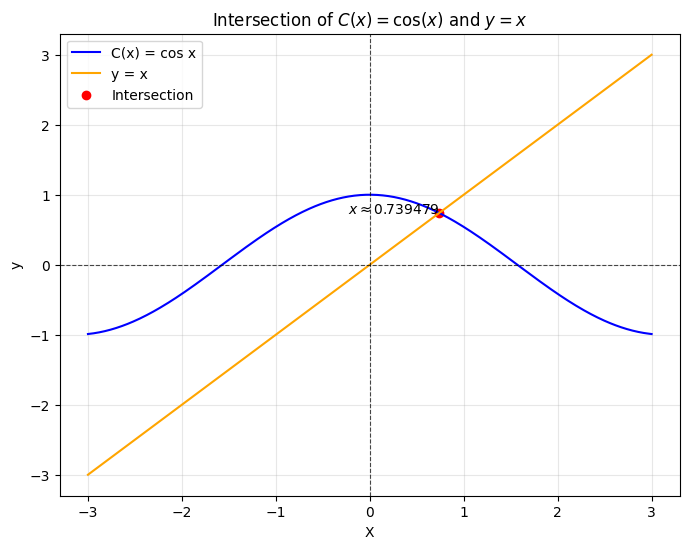

In [ ]:
# define our range
x = np.linspace(-3, 3, 500)

# define our functions
cos_x = np.cos(x)
y_line = x

# calculate the intersection with a tol of 0,01
intersection_x = x[np.isclose(cos_x, y_line, atol=0.01)]

# create a graph
plt.figure(figsize=(8, 6))
plt.plot(x, cos_x, label=r"C(x) = cos x", color='blue')
plt.plot(x, y_line, label=r"y = x", color='orange')
plt.scatter(intersection_x, intersection_x, color='red', label='Intersection')

for ix in intersection_x:
    iy = ix
    plt.text(ix, iy, r"$x \approx {0:.6f}$".format(ix), fontsize=10, color='black', ha='right')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)
plt.axvline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)
plt.title("Intersection of $C(x) = \cos(x)$ and $y = x$")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)


As you can see, the value of the intersection is about $0,739479$. That would be our fixed point for $C(x) = cos x$

Another type of orbit is the ***periodic*** (or ***cycle***). The point $x_{0}$ is periodic if $F^n(x_{0}) = x_{0}$ for some $n > 0$. The least such $n$ is called the *prime period* of the orbit. An interesting thing to point is that "if $x_{0}$ is periodic with the *prime period* $n$, then the orbit of $x_{0}$ is just a repeating sequence of numbers."

In general, to find cycles of period $n$ you have to solve $F^n(x) = x$. Although it can be very difficult sometimes depending on the function or the value of $n$. 

Also, if $x_{0}$ has a prime period $k$, then $x_{0}$ is fixed by $F^{2k}$. We can also define a general case, in his words:
<br>
<br>
> Similarly, $x_{0}$ is fixed by $F^{nk}$, so we say that $x_{0}$ has a period $nk$ for any positive integer $n$. We reserve the word *prime period* for the case $n = 1$.

<br>

Another term we can define here is the ***eventually fixed*** (or ***eventually periodic***). A point $x_{0}$ that is not fixed or periodic, but has some point on its orbit that is fixed or periodic is called ***eventually fixed***

And finally, to end this topic, we can talk about some orbits that tend to a specific limit.

As you may have guessed, for a typical dynamic system, most orbits are not *fixed* or *periodic*. In fact, they will probably tend to a limit. We can note that using the $\to$ notation. For example, $F^n(x_{0}) \to L$ 

#### **- Other Orbits**

In this part of the book we can take a look at a fraction of what we are going to be dealing along this course im the scope of chaotic behavior. The example given by Devaney is about how orbits of simple functions can have and incredible complexity. For instance, we can take a function $F(x) = x^2 - 2$ and analyse two interesting orbits: 

The first one is quite simple, the orbit of $x_{0} = 0$, it is eventually fixed: $0, -2, 2, 2, 2, 2, ...$

But the second one is very complex, the orbit of $x_{0} = 0.1$ if far from being fixed. It seems to "wander almost randomly" on the terminal $[-2, 2]$. He also shows us a histogram of 20.000 computed points on the orbit of 0.1. We can replicate this result and even modify it to have more data:

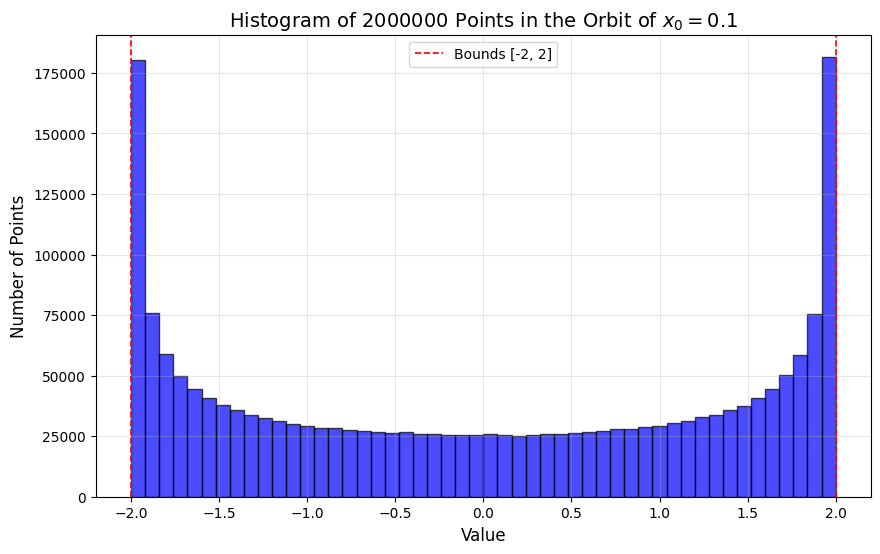

In [2]:
def F(x):
    return x**2 - 2

n_iterations = 2_000_000
x0 = 0.1
orbit = [x0]

for _ in range(n_iterations - 1):
    orbit.append(F(orbit[-1]))

orbit = np.array(orbit)

plt.figure(figsize=(10, 6))
plt.hist(orbit, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title(f"Histogram of {n_iterations} Points in the Orbit of $x_0 = 0.1$", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Number of Points", fontsize=12)
plt.grid(alpha=0.3)

plt.axvline(-2, color='red', linestyle='--', linewidth=1.2, label="Bounds [-2, 2]")
plt.axvline(2, color='red', linestyle='--', linewidth=1.2)
plt.legend(fontsize=10)


#### **- The Doubling Function**

He gives here some contextualization about the the doubling function, i particularly don't think i should enter in this topic here, we might as well don't need it later on (but i recommend you checking out).

---

### **Chapter 4 - Graphical Analysis**

#### **- Graphical Analysis**

This is a very important part of a very important chapter, here he teaches us a method to analyse the behavior of an orbit geometrically. I couldn't use better words than his to describe this method:
<br>
<br>
> Suppose we have the graph of a function $F$ and wish to display the orbit of a given point $x_{0}$. We begin by superimposing the diagonal line $y = x$ on the graph of $F$. To find the orbit of $x_{0}$, we begin at the point $(x_{0}, x_{0})$ on the diagonal directly above $x_{0}$ on the x-axis. We first draw a vertical line to the graph of $F$. When this line meets the graph, we have reached the point $(x_{0}, F(x_{0}))$. We then draw a horizontal line from this point to the diagonal. We reach the diagonal at the point whose y-coordinate is $F(x_{0})$, and so the x-coordinate is $F(x_{0})$. Thus we reach the diagonal directly over the point whose x-coordinate is $F(x_{0})$, the next point on the orbit of $x_{0}$.
<br>
> Now we continue this procedure. Draw a vertical line from $(F(x_{0}), F(x_{0}))$ on the diagonal to the graph: this yields the point $(F(x_{0}), F^2(x_{0}))$. Then a horizontal line to the diagonal reaches the diagonal at $(F^2(x_{0}), F^2(x_{0}))$, directly above the next point on the orbit.
<br>
> To display the orbit of $x_{0}$ geometrically, we thus continue this procedure: we first draw a vertical line from the diagonal to the graph, then a horizontal line from the graph back to the diagonal. The resulting "staircase" or "cobweb" provides an illustrative picture of the orbit of $x_{0}$.

<br>

We can plot two examples seen on the book to demonstrate this procedure. The first one being the function $F(x) = \sqrt{x}$ on the interval $[0, 4]$ using a $x_{0} = 3$:

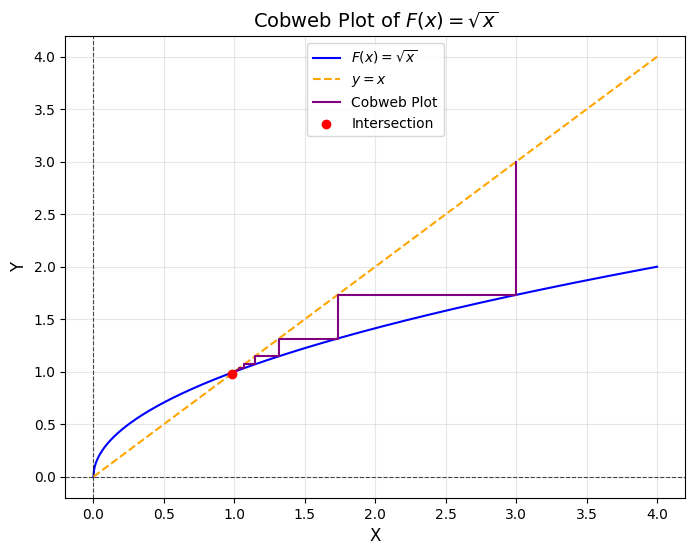

In [3]:
# define the function
def F(x):
    return x**(1/2)

# define the interval
x = np.linspace(0, 4, 1000)
y = x

# the value we want to analyse the orbit and the number of iterations that we are going to apply the method
x0 = 3
iterations = 30 

# giving the initial values to the coordinates
orbit_x = [x0]
orbit_y = [x0]

# find the intersections
intersection_x = x[np.isclose(F(x), y, atol=0.01)]

# now we apply the method 
for _ in range(iterations):
    orbit_x.append(orbit_x[-1])
    orbit_y.append(F(orbit_x[-1]))
    
    orbit_x.append(F(orbit_x[-2]))
    orbit_y.append(F(orbit_x[-2]))

# create the graph
plt.figure(figsize=(8, 6))
plt.plot(x, F(x), label=r"$F(x) = \sqrt{x}$", color="blue")
plt.plot(x, y, label=r"$y = x$", color="orange", linestyle="--")
plt.plot(orbit_x, orbit_y, color="purple", label="Cobweb Plot")
plt.scatter(intersection_x[1], intersection_x[1], color="red", label="Intersection", zorder=5)

plt.title("Cobweb Plot of $F(x) = \sqrt{x}$", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--", alpha=0.7)
plt.axvline(0, color="black", linewidth=0.8, linestyle="--", alpha=0.7)
plt.legend()
plt.grid(alpha=0.3)

We can clearly see that it leads to the point of intersection $x = 1$.

Another function that we can take a look and apply the graphical analysis is an already discussed, the $C(x) = cos x$. Lets also take a $x = -1.5$ (you can take another value if you want):

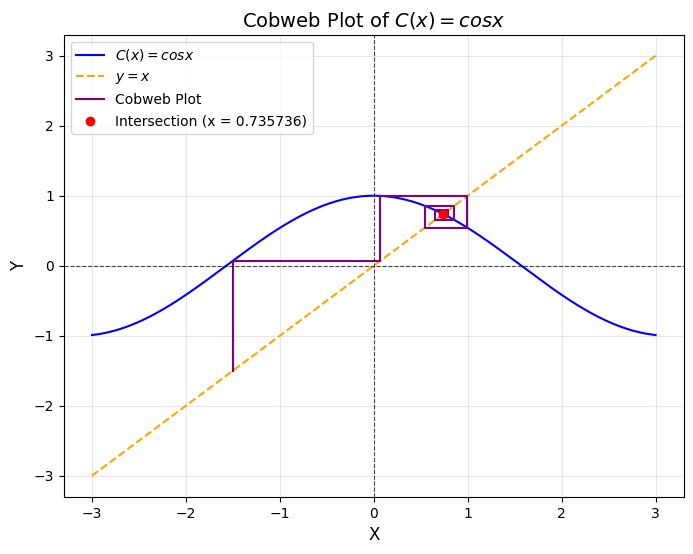

In [4]:
# define the function
def C(x):
    return np.cos(x)

# define the interval
x = np.linspace(-3, 3, 1000)
y = x

# the value we want to analyse the orbit and the number of iterations that we are going to apply the method
x0 = -1.5
iterations = 30 

# giving the initial values to the coordinates
orbit_x = [x0]
orbit_y = [x0]

# find the intersections
intersection_x = x[np.isclose(C(x), y, atol=0.01)]

# now we apply the method 
for _ in range(iterations):
    orbit_x.append(orbit_x[-1])
    orbit_y.append(C(orbit_x[-1]))
    
    orbit_x.append(C(orbit_x[-2]))
    orbit_y.append(C(orbit_x[-2]))

# create the graph
plt.figure(figsize=(8, 6))
plt.plot(x, C(x), label=r"$C(x) = cos x$", color="blue")
plt.plot(x, y, label=r"$y = x$", color="orange", linestyle="--")
plt.plot(orbit_x, orbit_y, color="purple", label="Cobweb Plot")
plt.scatter(intersection_x[1], intersection_x[1], color="red", label=f"Intersection (x = {intersection_x[0]:.6f})", zorder=5)

plt.title("Cobweb Plot of $C(x) = cos x$", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--", alpha=0.7)
plt.axvline(0, color="black", linewidth=0.8, linestyle="--", alpha=0.7)
plt.legend()
plt.grid(alpha=0.3)

And here you can see that the orbit also tends to the point of intersection.

He also mentioned how we can see the behavior of periodic orbits on a graphical analysis, some sort of closed "circuit" is drawn. 

But we cannot understand the behavior of all orbits of all functions using this method, it's given to us an example of how the orbit can get complicated sometimes. Showing us a little glimpse of chaotic behavior. For instance, he mentions the function $F(x) = 4x(1-x)$. Let's take a look:

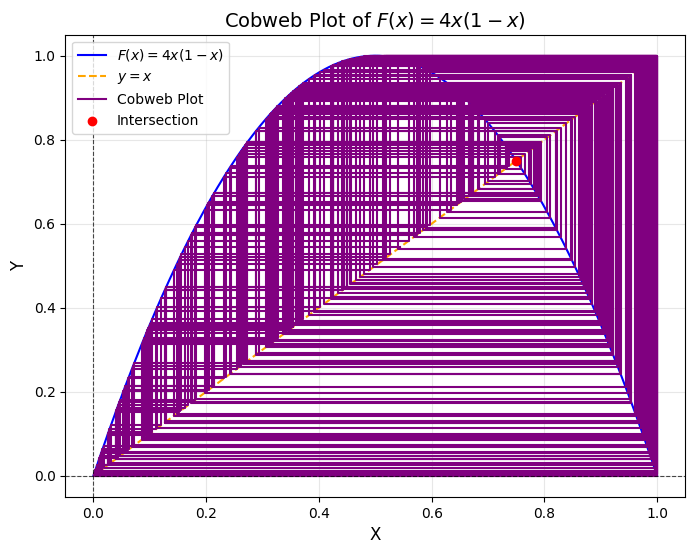

In [16]:
def F(x):
    return 4*x*(1-x)

# define the interval
x = np.linspace(0, 1, 1000)
y = x

# the value we want to analyse the orbit and the number of iterations that we are going to apply the method
x0 = 0.1
iterations = 300

# giving the initial values to the coordinates
orbit_x = [x0]
orbit_y = [x0]

# find the intersections
intersection_x = x[np.isclose(F(x), y, atol=0.001)]

# now we apply the method 
for _ in range(iterations):
    orbit_x.append(orbit_x[-1])
    orbit_y.append(F(orbit_x[-1]))
    
    orbit_x.append(F(orbit_x[-2]))
    orbit_y.append(F(orbit_x[-2]))

# create the graph
plt.figure(figsize=(8, 6))
plt.plot(x, F(x), label=r"$F(x) = 4x(1-x)$", color="blue")
plt.plot(x, y, label=r"$y = x$", color="orange", linestyle="--")
plt.plot(orbit_x, orbit_y, color="purple", label="Cobweb Plot")
plt.scatter(intersection_x[1], intersection_x[1], color="red", label="Intersection", zorder=5)

plt.title("Cobweb Plot of $F(x) = 4x(1-x)$", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--", alpha=0.7)
plt.axvline(0, color="black", linewidth=0.8, linestyle="--", alpha=0.7)
plt.legend()
plt.grid(alpha=0.3)

#### **- Orbit Analysis**

For some orbits of some functions we can sometimes describe the behavior of all orbits of a dynamical system. The example that is brought to us is the function $F(x) = x^3$, which has fixed points 0, 1 and -1. The behavior is quite simple, if $|x_{0}| < 1$ the orbit tends to zero, but if $|x_{0}| > 1$ then the orbit tends to $\pm \infty$. 

When we can understand the orbits of all points we say that we have performed a complete *orbit analysis*. But keep in mind that this procedure is not a completely rigorous tool.

Let's get back to the example of $F(x) = x^3$ and try to plot at least one orbit discussed:

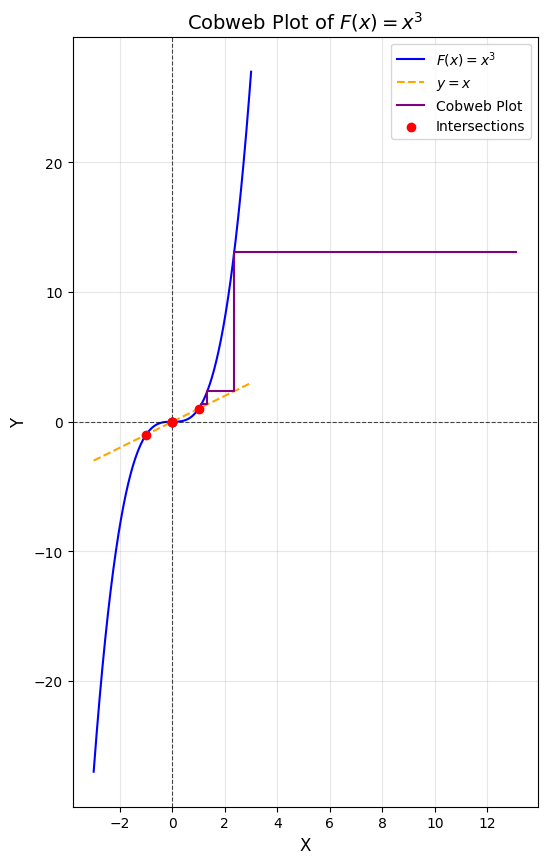

In [33]:
def F(x):
    return x**3

# define the interval
x = np.linspace(-3, 3, 10000)
y = x

# the value we want to analyse the orbit and the number of iterations that we are going to apply the method
x0 = 1.1
iterations = 3

# giving the initial values to the coordinates
orbit_x = [x0]
orbit_y = [x0]

# find the intersections
intersection_x = x[np.isclose(F(x), y, atol=0.001)]

# now we apply the method 
for _ in range(iterations):
    orbit_x.append(orbit_x[-1])
    orbit_y.append(F(orbit_x[-1]))
    
    orbit_x.append(F(orbit_x[-2]))
    orbit_y.append(F(orbit_x[-2]))

# create the graph
plt.figure(figsize=(6, 10))
plt.plot(x, F(x), label=r"$F(x) = x^3$", color="blue")
plt.plot(x, y, label=r"$y = x$", color="orange", linestyle="--")
plt.plot(orbit_x, orbit_y, color="purple", label="Cobweb Plot")
plt.scatter(intersection_x, intersection_x, color="red", label="Intersections", zorder=5)

plt.title("Cobweb Plot of $F(x) = x^3$", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--", alpha=0.7)
plt.axvline(0, color="black", linewidth=0.8, linestyle="--", alpha=0.7)
plt.legend()
plt.grid(alpha=0.3)

#### **- The Phase Portrait**

Although the phase portrait method can be useful in some cases, i don't think it's relevant to understanding this study (in my opinion). But i highly recommend you checking it out!

---

### **Chapter 5 - Fixed and Periodic Points**

I consider this, along with chapter 6, the two most important chapters that i'll be discussing in this study. We will see that sometimes we need some simple calculus tools to help us.

#### **- A fixed Point Theorem**

In this section he presents to us the "*Fixed Point Theorem*" as an immediate consequence of the "*The Intermediate Value Theorem*". I'm gonna quote both of the theorems: 

<br>

> ***The intermediate Value Theorem.*** Suppose $F:[a, b] \to \real$ is continuos. Suppose $y_{0}$ lies between $F(a)$ and $F(b)$. Then there is an $x_{0}$ in the interval $[a, b]$ with $F(x_{0}) = y_{0}$.

And

> ***Fixed Point Theorem.*** Suppose $F:[a, b] \to [a, b]$ is continuous. Then there is a fixed point for $F$ in $[a, b]$.

He also did some remarks about this theorem. I think it's very important to understant some things about those remakrs: this theorem asserts the existence of at least one fixed point, there may be more; the fact that it strongly depends on both continuity and that $F$ takes the interval $[a, b]$ into itself; also that it's important that this interval be closed; although this theorem asserts the existence of at least one fixed point, it does not give us a method to actually finding them.  

#### **- Attraction and Repulsion**

This part here is pretty simple, it states the existence of two different types of fixed points, *attracting* and *repelling*. To illustrate the idea behind those concecpts, it's used the function $F(x) = x^2$ as an example, and you may have imagined that this function hold both of the types of fixed points. This function's fixed points are 0 and 1, and you can easily distinguish what type which one of them are. For values of $x_{0}$ that are, in module, smaller than 1 we can see that the orbit tends towards 0, and for values greater than 1, we can easily see that the orbit tends far from 1. I'ts safe to describe 0 as an *attracting fixed point* and 1 as a *repelling fixed point*.

#### **- Calculus of Fixed Points**

In this part we begin having an example about linear functions $A(x) = \alpha x$ with $0 < \alpha < 1$ and $B(x) = \beta x$ with $\beta > 1$. In this example he talks about how both have a fixed point 0 but with different types (in A being attractive and in B being respulsive) and even if we consider $-1 < \alpha < 0$ and $\beta < -1$ we still have the same behavior (although in this case the orbits keeps hopping back and forth from left to right about zero). If you compare this results with the ideia of a derivative, we can certainly use this incredible tool here as well. This leads to an important definition:

<br>

> ***Definition.*** Suppose $x_{0}$ is a fixed point for $F$. Then $x_{0}$ is an *attracting fixed point* if $|F'(x_{0})| < 1$. The point $x_{0}$ is a *repelling fixed point* if $|F'(x_{0})| > 1$. Finally, if $|F'(x_{0})| = 1$, the fixed point is called *neutral* or *indifferent*.

To end this section, i would like to briefly talk about something that he mentions: in cases that $|F'(x_{0})| = 0$ we may have different kinds of representing the orbit. In all cases, however, the fixed point is *attracting*.

#### **- Why is this true?**

This may be one of the longest topics (if not the longest in our study) but i could not shorten this in a way that wouldn't affect important concecpts. 

This section begins questioning us about how do we know that the definition on the previous section is true when the slopes of the tangent lines are close to the cut-off points, namely $\pm 1$.

To answer this, we are presented to the *Mean Value Theorem* (you may already have seen this theorem):

<br>

> ***The Mean Value Theorem.*** Suppose F is a differentiable function on the interval $a \leq x \leq b$. Then there exists *c* between *a* and *b* for which the following equation is true: $$F'(c) = \frac{F(b) - F(a)}{b - a}$$

<br>

For us, this theorem lies in two propositions, the first one being:

<br>

> ***Attracting Fixed Point Theorem.*** Suppose $x_{0}$ is an attracting fixed point for F. Then there is an interval *I* that contains $x_{0}$ in its interior and in which the following condition is satisfied: if $x \in I$, then $F^n(x) \in I$ for all *n* and, moreover, $F^n(x) \to x_{0}$ as $n \to \infty$.

<br>

Although i didn't bring any proof for the previous theorems, this one in particular i think its worth taking a look:

<br>

> ***Proof:*** Since $|F'(x_{0})| < 1$, there is a number $\lambda > 0$ such that $|F'(x_{0})| < \lambda < 1$. We may therefore choose a number $\delta > 0$ so that $|F'(x)| < \lambda$ provided $x$ belongs to the interval $I = [x_{0} - \delta, x_{0} + \delta]$. Now let $p$ be any point in *I*. By the Mean Value Theorem $$\frac{|F(p) - F(x_{0})|}{|p - x|} < \lambda$$ so that $$|F(p) - F(x_{0})| < \lambda|p - x_{0}|.$$
> Since $x_{0}$ is fixed point, it follows that $$|F(p) - x_{0}| < \lambda|p - x_{0}|.$$
> This means that the distance from $F(p)$ to $x_{0}$ is smaller than the distance from *p* to $x_{0}$, since $0 < \lambda < 1$. In particular, $F(p)$ also lies in the interval *I*. Therefore we may apply the same argument to $F(p)$ and $F(x_{0})$, finding $$|F^2(p) - x_{0}| = |F^2(p) - F^2(x_{0})|$$ $$< \lambda|F(p) - F(x_{0})|$$ $$< \lambda^2|p - x_{0}|$$
> Since $\lambda < 1$, we have $\lambda^2 < \lambda$. This means that the points $F^2(p)$ and $x_{0}$ are even closer together than $F(p)$ and $x_{0}$. Thus we may continue using this argument to find that, for any $n > 0$, $$|F^n(p) - x_{0}| < \lambda^n|x - x_{0}|.$$
> Now $\lambda^n \to 0$ as $n \to \infty$. Thus, $F^n(p) \to x_{0}$ as $n \to \infty$. This completes the proof.